In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
%matplotlib inline
plt.style.use('seaborn-dark-palette')
from scipy import stats

import datetime as dt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
stop_words = set(stopwords.words('english')) 

import plotly
import plotly.express as px

/Users/heejinchae/opt/anaconda3/envs/torch/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/var/folders/d7/wr0_38q17_38rmx4dysxdyfh0000gn/T/ipykernel_1662/3107857835.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/heejinchae/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
class LemmaTokenizer:
    ignore_tokens = [',', '.', ';', ':', '"', '``', "''", '`']
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) if t not in self.ignore_tokens]

In [3]:
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
sub = pd.read_excel("./paraphrased.xlsx")
cols = sub.columns
col_ = cols[1:]
sub = pd.melt(sub, id_vars=['Unnamed: 0'],value_vars=col_).sort_values(by=['Unnamed: 0']).dropna()
sub.columns = ["op_type","less","question"]
sub = sub.drop(columns=["less"])
sub.head(30)

,op_type,question
0,0,How many buildings are within 3 minutes of dri...
1640,0,how many buildings are within 3 minutes of dri...
1681,0,What are the areas within a four-minute drive ...
1722,0,show the neighborhoods within a four-minute dr...
1763,0,show the zones within a 4-minute drive of each...
1804,0,show the areas within four minutes drive of ea...
1599,0,how many buildings are within 3 minutes of dri...
1394,0,Which houses are within 2 minutes driving time...
1435,0,What are the areas within a four-minute drive ...
1517,0,list the areas within a four-minute drive of e...


In [5]:
sub.shape

(7031, 2)

In [6]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 0 to 8363
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   op_type   7031 non-null   int64 
 1   question  7031 non-null   object
dtypes: int64(1), object(1)
memory usage: 164.8+ KB


In [7]:
sub.describe()

,op_type
count,7031.000000
mean,20.693642
std,11.908913
min,0.000000
25%,10.000000
50%,22.000000
75%,30.000000
max,40.000000


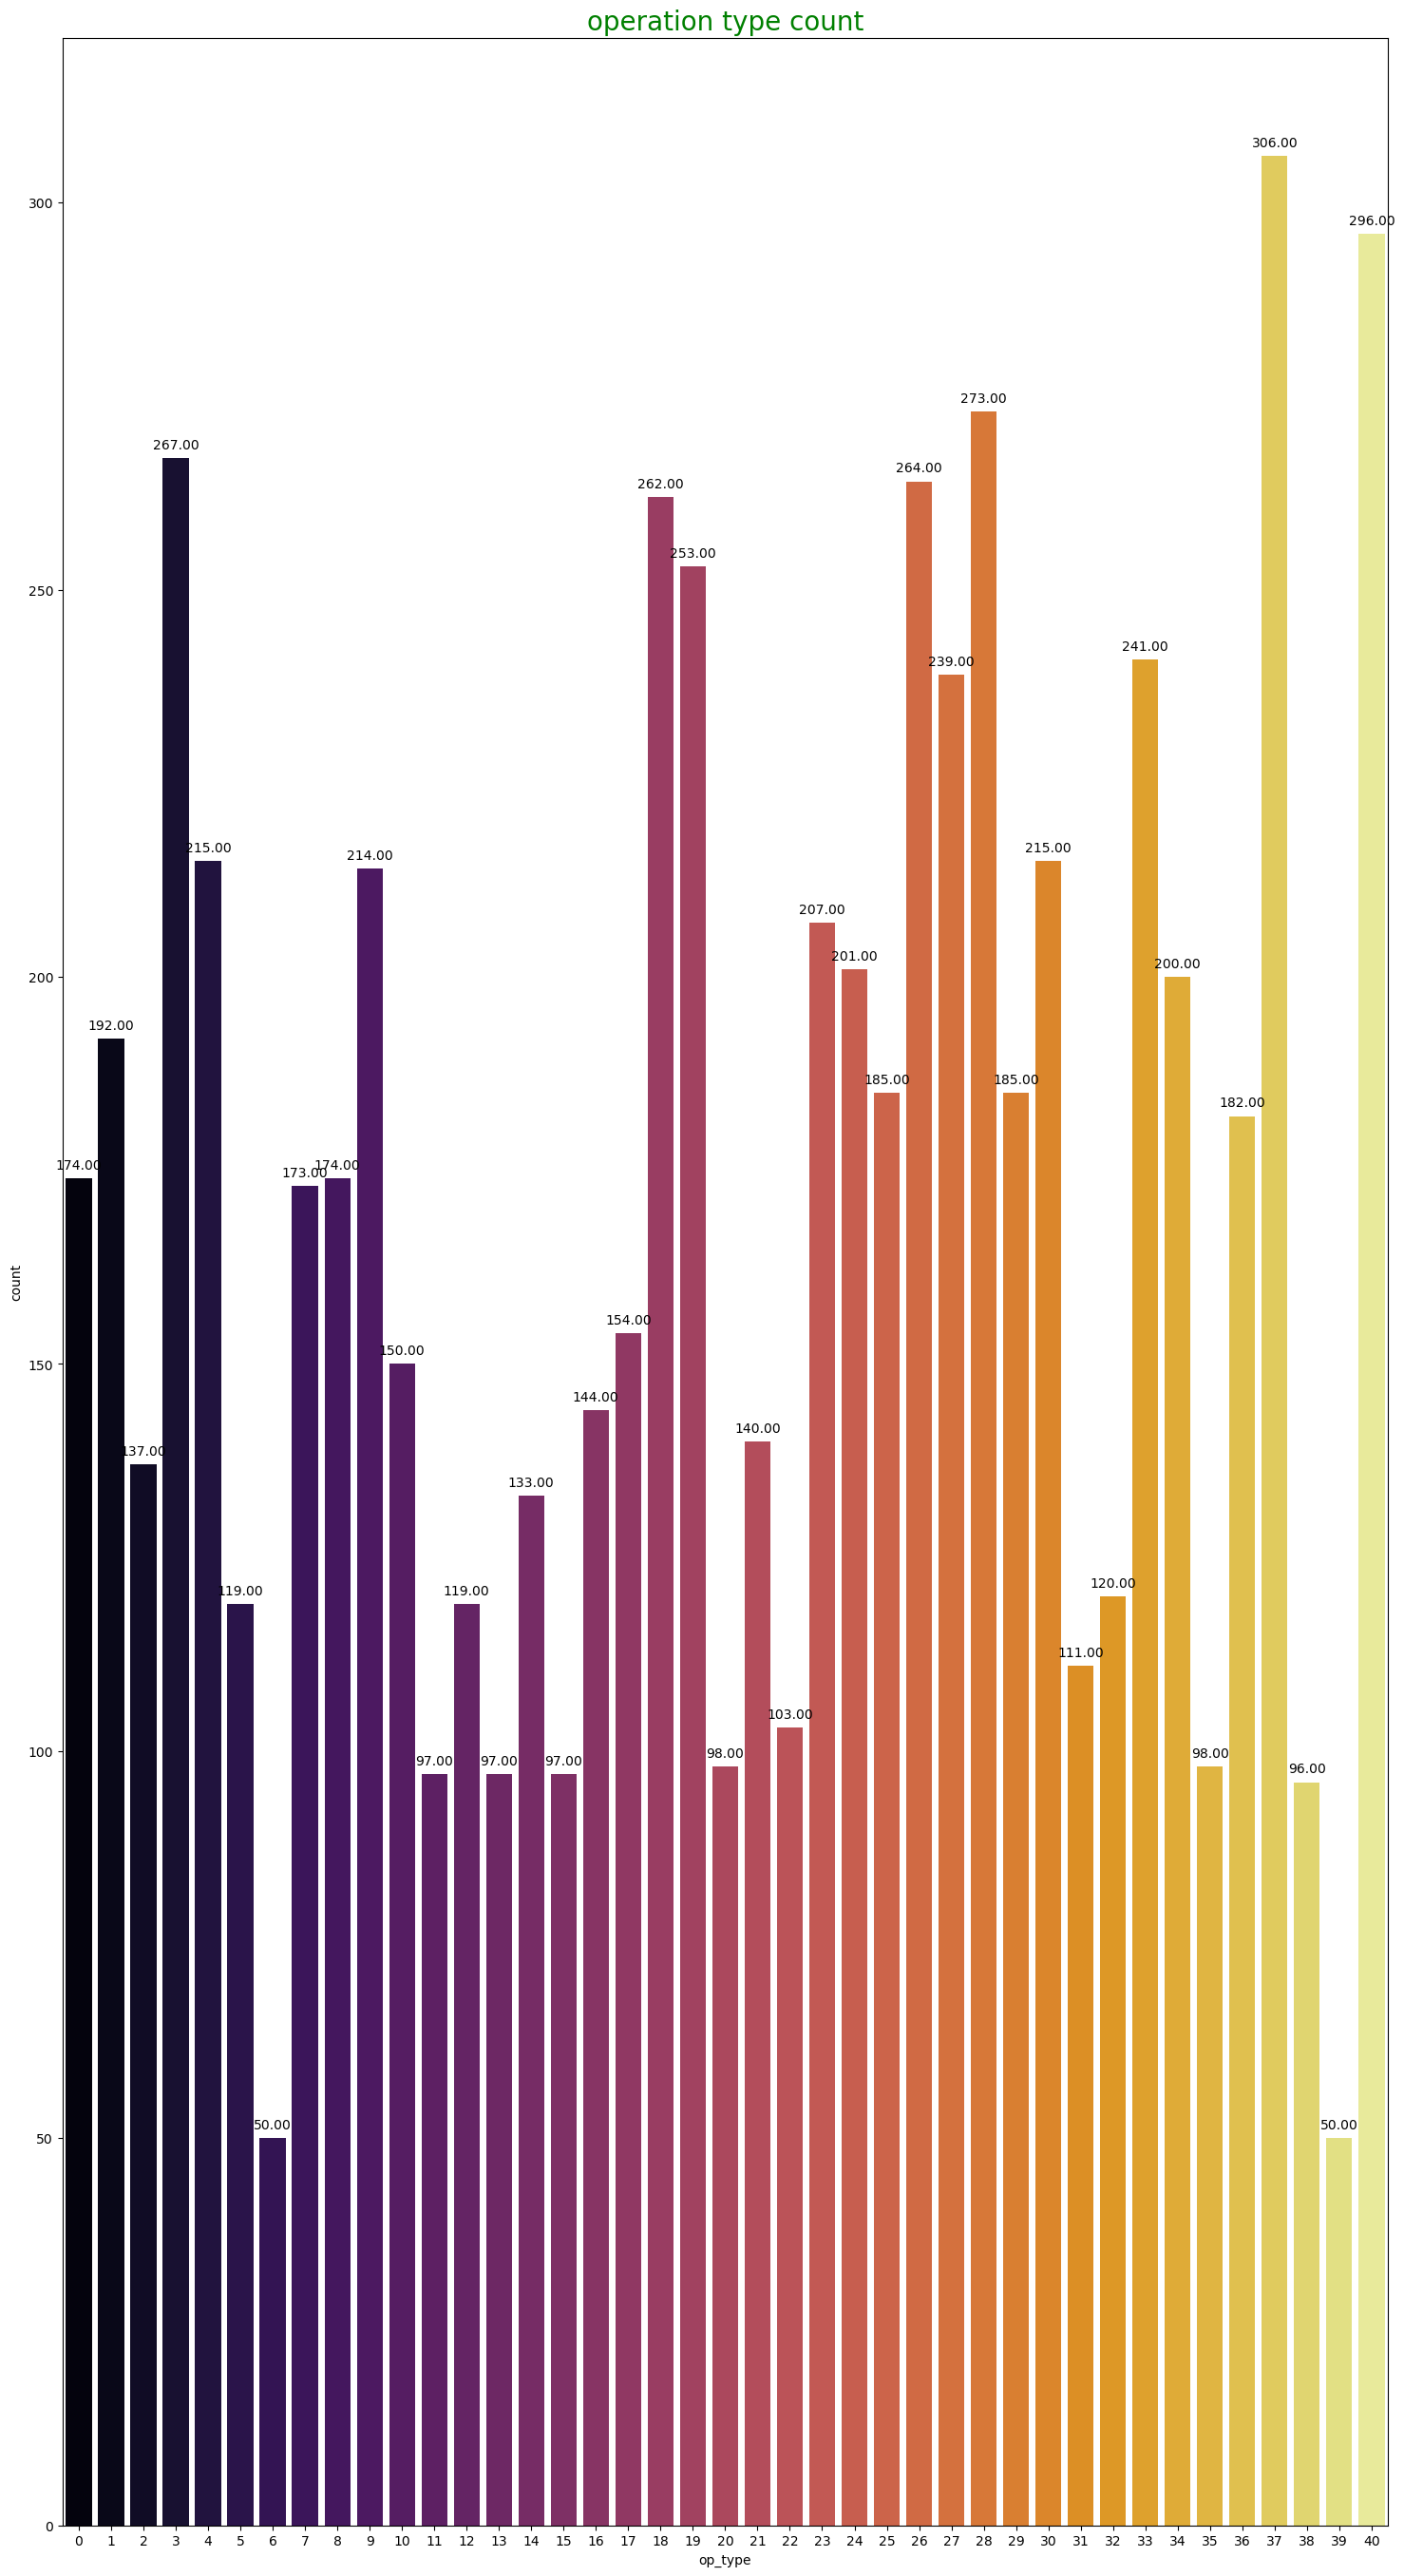

In [8]:
plt.figure(figsize=[18,34])
plot = sns.countplot(sub.op_type, palette = 'inferno')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('operation type count', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
#plt.xticks(rotation=90)
plt.show()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
sub.head()

,op_type,question
0,0,How many buildings are within 3 minutes of dri...
1640,0,how many buildings are within 3 minutes of dri...
1681,0,What are the areas within a four-minute drive ...
1722,0,show the neighborhoods within a four-minute dr...
1763,0,show the zones within a 4-minute drive of each...


In [11]:
questions = sub["question"]

In [12]:
def preprocess(document):
    'changes document to lower case and removes stopwords'

    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]

    # join words to make sentence
    document = " ".join(words)
    
    return document

In [19]:
# proccessed vs not processed 비교 해볼 것
questions = [question for question in questions]
#questions = [preprocess(question) for question in questions]


['many buildings within 3 minutes driving time fire stations gwangju-si', 'many buildings within 3 minutes driving time fire stations naju-si ?', 'areas within four-minute drive fire station 2 a.m. tuesday dong-gu busan', 'show neighborhoods within four-minute drive fire station tuesday dong-gu busan ?', 'show zones within 4-minute drive fire station 2 tuesday donggu busan ?', 'show areas within four minutes drive fire station 2 tuesday dong-gu busan ?', 'many buildings within 3 minutes driving time fire stations naju-si ?', 'houses within 2 minutes driving time fire stations ( current location ) incheon', 'areas within four-minute drive fire station 2 a.m. tuesday yeongyang-gun', 'list areas within four-minute drive fire station 2 tuesday yeongyang-gun ?', 'many buildings within 3 minutes driving time fire stations naju-si', 'show zones within four-minute drive fire station 2 tuesday yeongyang-gun ?', 'areas within 20 minutes driving time flower stores icheon-si', 'show areas within f

In [18]:
vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='utf-8', stop_words='english', )
tfidf_model = vectorizer.fit_transform(questions)

In [ ]:
tfidf = pd.DataFrame(tfidf_model.toarray(), columns = vectorizer.get_feature_names())

In [ ]:
print(vectorizer.get_feature_names())

["'s", '(', ')', '-', '-si', '0', '0.3km', '0.5km', '1', '1.5', '10', '100', '1000', '12', '1202', '135', '15', '1970', '1990', '1994', '1km', '2', '20', '2000', '2015', '2017', '2019', '250', '2640', '3', '30', '300', '3000', '45', '5000', '5280', '6', '60', '6000', '6pm', '700', '7920', '8', '800', '?', 'a.m.', 'accident', 'accommodation', 'address', 'age', 'alarm', 'altitude', 'annual', 'ansan-si', 'arcade', 'area', 'aspect', 'available', 'average', 'bank', 'banking', 'bedroom', 'belt', 'bigger', 'biggest', 'black', 'block', 'blvd', 'body', 'borough', 'boseong', 'boseong-gun', 'boulevard', 'branch', 'breast', 'buan-gun', 'building', 'buk-gu', 'bukgu', 'bundang', 'bundang-gu', 'busan', 'busanjin', 'busanjin-gu', 'cancer', 'care', 'celsius', 'census', 'center', 'central', 'centre', 'cervix', 'changwon-si', 'characteristic', 'cheoin', 'cheoin-gu', 'cheongyang', 'cheongyang-gun', 'chilgok-gun', 'city', 'closest', 'commercial', 'company', 'conservation', 'construction', 'contains', 'coun

In [ ]:
sub["op_type"].value_counts()

labels = sub["op_type"]


In [ ]:
tokenizer=LemmaTokenizer()
token_stop = tokenizer(' '.join(stop_words))

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='utf-8', stop_words='english', tokenizer=tokenizer)
features = tfidf.fit_transform(sub["question"]).toarray()
features.shape

(7031, 401)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(sub['question'],
                                                    sub['op_type'],
                                                    stratify=sub['op_type'],
                                                    random_state = 0)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
#30
print(clf.predict(count_vect.transform(["which mental health facility is nearest to each address in seowon-gu?"])))

[40]


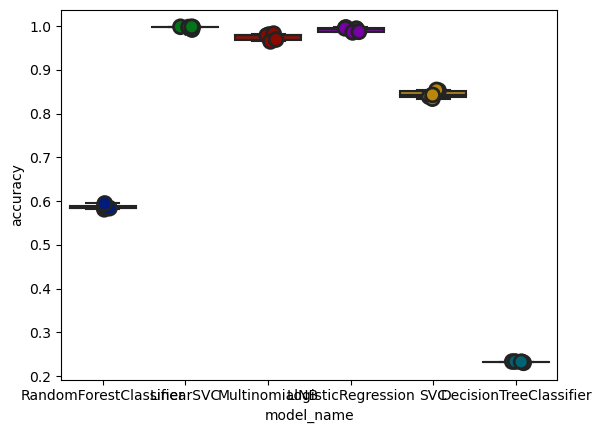

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=5),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
# Accuracy score
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.997013
LogisticRegression        0.991892
MultinomialNB             0.975394
RandomForestClassifier    0.586546
SVC                       0.919073
Name: accuracy, dtype: float64

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


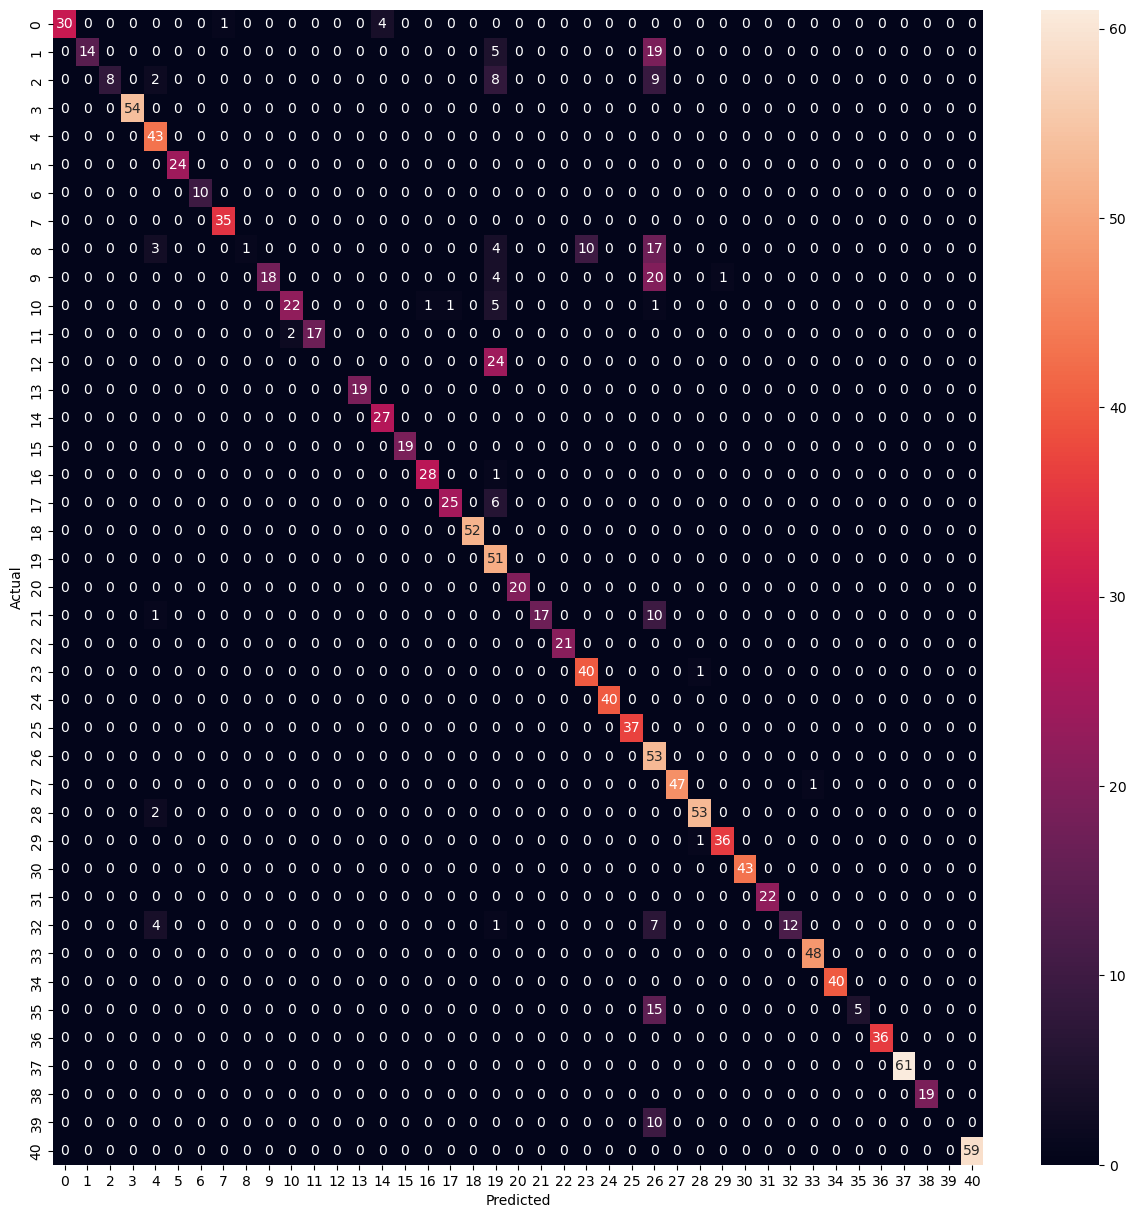

In [ ]:
model = LinearSVC()
model = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, sub.index, test_size=0.2, stratify=labels, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(sorted(list(set(labels.values))))

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=sorted(list(set(labels.values))), 
            yticklabels=sorted(list(set(labels.values)))
            )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn import metrics

some_key =sub['op_type'].unique().astype('str').tolist() 
print(sub['op_type'].unique().tolist())
print('accuracy %s' % metrics.accuracy_score(y_pred, y_test))
print(metrics.classification_report(y_test, y_pred, target_names=some_key))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
accuracy 0.8571428571428571
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        35
           1       1.00      0.37      0.54        38
           2       1.00      0.30      0.46        27
           3       1.00      1.00      1.00        54
           4       0.78      1.00      0.88        43
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        10
           7       0.97      1.00      0.99        35
           8       1.00      0.03      0.06        35
           9       1.00      0.42      0.59        43
          10       0.92      0.73      0.81        30
          11       1.00      0.89      0.94        19
          12       0.00      0.00      0.00        24
          13       1.00      1.00      1.00        19
      